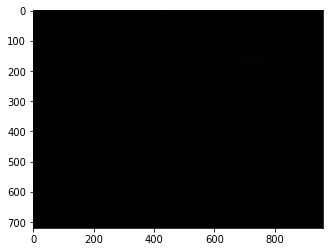

In [ ]:
# import module
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
  
# assign images
img1 = Image.open("frame_00175_clean.jpg")
img2 = Image.open("frame_00175_poisonous.jpg")
  
# finding difference
diff = ImageChops.difference(img1, img2)
  
# showing the difference
plt.imshow(diff)
plt.show()

In [ ]:
!pip install scipy==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.2 MB 1.5 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 4.1.4 requires scipy>=1.4.1, but you have scipy 1.1.0 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.1.0 which is incompatible.
jaxlib 0.3.15+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.1.0 which is incompatible.
jax 0.3.17 requires scipy>=1.5, but you have scipy 1.1.0 which is incompatible.
aeppl 0.0.33 requires scipy>=1.4.0, but you have scipy 1.1.0 which is incompatible.


In [ ]:
import sys

from scipy.misc import imread
from scipy.linalg import norm
from scipy import sum, average

def main():
    file1, file2 = sys.argv[1:1+2]
    # read images as 2D arrays (convert to grayscale for simplicity)
    img1 = to_grayscale(imread("frame_00175_poisonous.jpg").astype(float))
    img2 = to_grayscale(imread("frame_00175_clean.jpg").astype(float))
    #img1 = to_grayscale(imread("frame_00175_clean.jpg").astype(float))
    #img2 = to_grayscale(imread("frame_00175_clean.jpg").astype(float))
    # compare
    n_m, n_0 = compare_images(img1, img2)
    print ("Manhattan norm:", n_m, "/ per pixel:", n_m/img1.size)
    print ("Zero norm:", n_0, "/ per pixel:", n_0*1.0/img1.size)

def compare_images(img1, img2):
    # normalize to compensate for exposure difference
    img1 = normalize(img1)
    img2 = normalize(img2)
    # calculate the difference and its norms
    diff = img1 - img2  # elementwise for scipy arrays
    m_norm = sum(abs(diff))  # Manhattan norm
    z_norm = norm(diff.ravel(), 0)  # Zero norm
    return (m_norm, z_norm)

def to_grayscale(arr):
    "If arr is a color image (3D array), convert it to grayscale (2D array)."
    if len(arr.shape) == 3:
        return average(arr, -1)  # average over the last axis (color channels)
    else:
        return arr

def normalize(arr):
    rng = arr.max()-arr.min()
    amin = arr.min()
    return (arr-amin)*255/rng

if __name__ == "__main__":
    main()

Manhattan norm: 450918.1199825458 / per pixel: 0.6523699652525258
Zero norm: 691114.0 / per pixel: 0.9998755787037037


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
